In [94]:
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import root_mean_squared_error,r2_score,mean_absolute_percentage_error,mean_squared_error
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt


In [28]:
np.random.seed(42)
print(np.random.rand(6)) 

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452]


In [24]:
print(np.random.rand(5)) 

[0.15599452 0.05808361 0.86617615 0.60111501 0.70807258]


In [29]:
np.random.seed(42)
print(np.random.rand(5)) 

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]


In [48]:
np.random.seed(42)
X=np.linspace(-3,3,30)
Y_true = X**2

In [39]:
X

array([-3.        , -2.79310345, -2.5862069 , -2.37931034, -2.17241379,
       -1.96551724, -1.75862069, -1.55172414, -1.34482759, -1.13793103,
       -0.93103448, -0.72413793, -0.51724138, -0.31034483, -0.10344828,
        0.10344828,  0.31034483,  0.51724138,  0.72413793,  0.93103448,
        1.13793103,  1.34482759,  1.55172414,  1.75862069,  1.96551724,
        2.17241379,  2.37931034,  2.5862069 ,  2.79310345,  3.        ])

In [40]:
X.shape

(30,)

In [37]:
Y_true

array([9.        , 7.80142687, 6.68846611, 5.66111772, 4.71938169,
       3.86325803, 3.09274673, 2.4078478 , 1.80856124, 1.29488704,
       0.86682521, 0.52437574, 0.26753864, 0.09631391, 0.01070155,
       0.01070155, 0.09631391, 0.26753864, 0.52437574, 0.86682521,
       1.29488704, 1.80856124, 2.4078478 , 3.09274673, 3.86325803,
       4.71938169, 5.66111772, 6.68846611, 7.80142687, 9.        ])

In [41]:
noise = np.random.normal(0,1,size=X.shape)

In [42]:
noise

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375])

In [45]:
noise.shape

(30,)

In [46]:
np.mean(noise)

np.float64(-0.18814689585103744)

In [49]:
Y = Y_true + noise

In [47]:
Y

array([ 9.49671415,  7.66316257,  7.33615465,  7.18414757,  4.48522831,
        3.62912107,  4.67195955,  3.17528253,  1.33908685,  1.83744708,
        0.40340752,  0.05864599,  0.50950092, -1.81696633, -1.71421629,
       -0.55158598, -0.91651721,  0.58178598, -0.38364833, -0.54547849,
        2.76053581,  1.58278494,  2.475376  ,  1.66799854,  3.3188753 ,
        4.83030428,  4.51012414,  7.06416413,  7.20078818,  8.70830625])

In [51]:
np.array([X,Y]).shape

(2, 30)

In [53]:
np.array([X,Y]).T

array([[-3.        ,  9.49671415],
       [-2.79310345,  7.66316257],
       [-2.5862069 ,  7.33615465],
       [-2.37931034,  7.18414757],
       [-2.17241379,  4.48522831],
       [-1.96551724,  3.62912107],
       [-1.75862069,  4.67195955],
       [-1.55172414,  3.17528253],
       [-1.34482759,  1.33908685],
       [-1.13793103,  1.83744708],
       [-0.93103448,  0.40340752],
       [-0.72413793,  0.05864599],
       [-0.51724138,  0.50950092],
       [-0.31034483, -1.81696633],
       [-0.10344828, -1.71421629],
       [ 0.10344828, -0.55158598],
       [ 0.31034483, -0.91651721],
       [ 0.51724138,  0.58178598],
       [ 0.72413793, -0.38364833],
       [ 0.93103448, -0.54547849],
       [ 1.13793103,  2.76053581],
       [ 1.34482759,  1.58278494],
       [ 1.55172414,  2.475376  ],
       [ 1.75862069,  1.66799854],
       [ 1.96551724,  3.3188753 ],
       [ 2.17241379,  4.83030428],
       [ 2.37931034,  4.51012414],
       [ 2.5862069 ,  7.06416413],
       [ 2.79310345,

In [59]:
np.array([X,Y]).T.shape

(30, 2)

In [60]:
data=pd.DataFrame(np.array([X,Y]).T,columns=['X','Y'])

In [61]:
data

,X,Y
0,-3.000000,9.496714
1,-2.793103,7.663163
2,-2.586207,7.336155
3,-2.379310,7.184148
4,-2.172414,4.485228
5,-1.965517,3.629121
6,-1.758621,4.671960
7,-1.551724,3.175283
8,-1.344828,1.339087
9,-1.137931,1.837447


In [66]:
X=pd.DataFrame(X,columns=['X'])
Y=pd.DataFrame(Y,columns=['Y'])

In [67]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [68]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((21, 1), (9, 1), (21, 1), (9, 1))

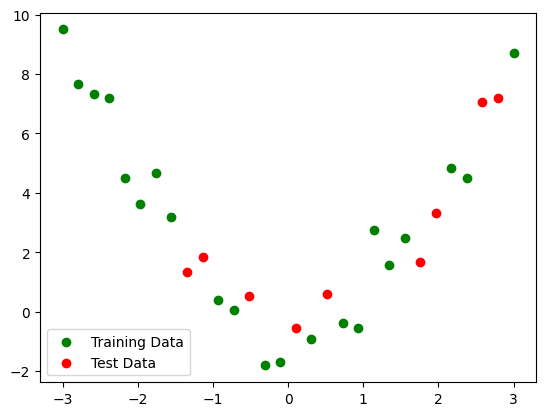

In [77]:
plt.scatter(X_train,Y_train,color='green',label='Training Data')
plt.scatter(X_test,Y_test,color='red',label='Test Data')
plt.legend()
plt.show()

In [208]:
degree=15
poly_model=make_pipeline(PolynomialFeatures(degree),LinearRegression())

In [83]:
poly_model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=15)),
                ('linearregression', LinearRegression())])

In [209]:
poly_model.fit(X_train,Y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=15)),
                ('linearregression', LinearRegression())])

In [210]:
y_train_pred = poly_model.predict(X_train)
y_test_pred = poly_model.predict(X_test)

In [211]:
root_mean_squared_error(Y_train,y_train_pred)

np.float64(0.4978745565533041)

In [212]:
root_mean_squared_error(Y_test,y_test_pred)

np.float64(71.63059129192237)

In [213]:
mean_absolute_percentage_error(Y_train, y_train_pred)

np.float64(0.4672567784849453)

In [214]:
mean_absolute_percentage_error(Y_test, y_test_pred)

np.float64(5.289887203883375)

In [218]:
print("Overfitted Model train MSE ", mean_squared_error(Y_train, y_train_pred))
print("Overfitted Model test MSE ", mean_squared_error(Y_test, y_test_pred))
print("Overfitted Model train R2 ", r2_score(Y_train, y_train_pred))
print("Overfitted Model test R2 ", r2_score(Y_test, y_test_pred))

Overfitted Model train MSE  0.24787907406314919
Overfitted Model test MSE  5130.941608830424
Overfitted Model train R2  0.9787895980557461
Overfitted Model test R2  -731.8991857390939


In [101]:
X_plot =   X.values

In [105]:
y_plot = poly_model.predict(X_plot)

/Users/bkannadasan/Documents/GitHub/DataScience/.conda/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [116]:
y_plot.T

array([[ 9.50389895e+00,  7.59492904e+00,  7.60162229e+00,
         6.67506175e+00,  4.85945018e+00,  3.93828112e+00,
         3.87480484e+00,  3.63970627e+00,  2.76488516e+00,
         1.57191951e+00,  5.18314241e-01, -2.78593557e-01,
        -9.42518574e-01, -1.49813946e+00, -1.76734641e+00,
        -1.60283847e+00, -1.13798798e+00, -6.90448340e-01,
        -3.52889162e-01,  2.28162520e-01,  1.38923057e+00,
         2.55452245e+00,  2.19347445e+00, -9.35893035e-02,
        -7.30507892e-01,  4.84380180e+00,  4.50577939e+00,
        -5.33351020e+01, -1.98964114e+02,  8.70834538e+00]])

In [114]:
y_plot.shape

(30, 1)

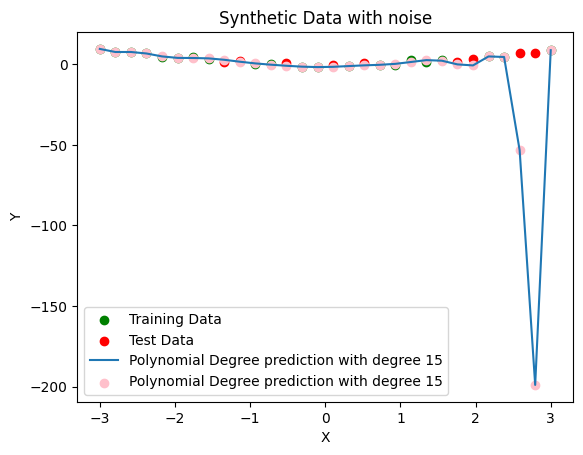

In [172]:
plt.scatter(X_train,Y_train,color='green',label='Training Data')
plt.scatter(X_test,Y_test,color='red',label='Test Data')
plt.plot(X_plot,y_plot,label='Polynomial Degree prediction with degree 15')
plt.scatter(X_plot,y_plot,label='Polynomial Degree prediction with degree 15',color='pink')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Synthetic Data with noise')
plt.legend()
plt.show()

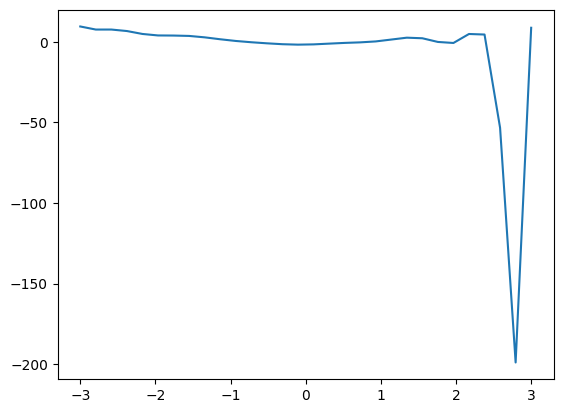

In [112]:
plt.plot(X_plot,y_plot,label='Polynomial Degree prediction with degree 15')

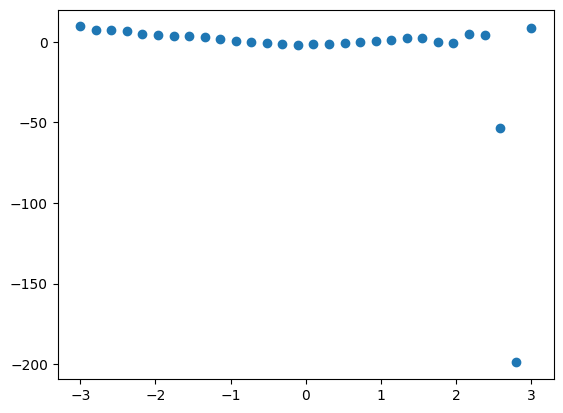

In [115]:
plt.scatter(X_plot,y_plot,label='Polynomial Degree prediction with degree 15')

In [123]:
X_plot.shape,y_plot.shape,type(X_plot),type(y_plot)

((30, 1), (30, 1), numpy.ndarray, numpy.ndarray)

In [153]:
np.array([X_plot,y_plot]).T

array([[[-3.00000000e+00,  9.50389895e+00],
        [-2.79310345e+00,  7.59492904e+00],
        [-2.58620690e+00,  7.60162229e+00],
        [-2.37931034e+00,  6.67506175e+00],
        [-2.17241379e+00,  4.85945018e+00],
        [-1.96551724e+00,  3.93828112e+00],
        [-1.75862069e+00,  3.87480484e+00],
        [-1.55172414e+00,  3.63970627e+00],
        [-1.34482759e+00,  2.76488516e+00],
        [-1.13793103e+00,  1.57191951e+00],
        [-9.31034483e-01,  5.18314241e-01],
        [-7.24137931e-01, -2.78593557e-01],
        [-5.17241379e-01, -9.42518574e-01],
        [-3.10344828e-01, -1.49813946e+00],
        [-1.03448276e-01, -1.76734641e+00],
        [ 1.03448276e-01, -1.60283847e+00],
        [ 3.10344828e-01, -1.13798798e+00],
        [ 5.17241379e-01, -6.90448340e-01],
        [ 7.24137931e-01, -3.52889162e-01],
        [ 9.31034483e-01,  2.28162520e-01],
        [ 1.13793103e+00,  1.38923057e+00],
        [ 1.34482759e+00,  2.55452245e+00],
        [ 1.55172414e+00,  2.193

In [154]:
np.array([X_plot,y_plot]).T.reshape(30,2).shape

(30, 2)

In [155]:
df = pd.DataFrame(np.array([X_plot,y_plot]).T.reshape(30,2),columns=['X','Y'])

In [160]:
df[df['X'] > 2]

,X,Y
25,2.172414,4.843802
26,2.379310,4.505779
27,2.586207,-53.335102
28,2.793103,-198.964114
29,3.000000,8.708345


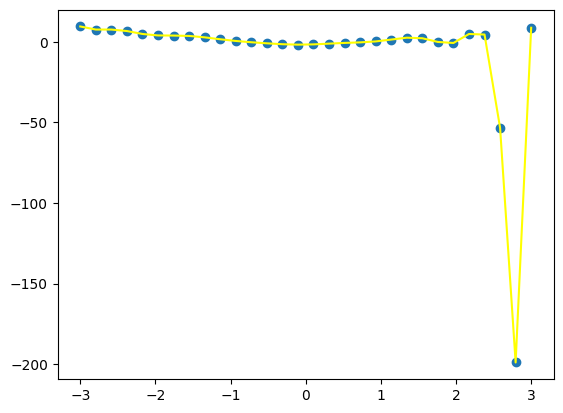

In [163]:
plt.scatter(df['X'],df['Y'])
plt.plot(df['X'],df['Y'],color='yellow')

In [219]:
poly_model = make_pipeline(PolynomialFeatures(degree=15),Ridge(alpha=10.0))

In [221]:
poly_model.fit(X_train,Y_train)
y_train_pred = poly_model.predict(X_train)
y_test_pred = poly_model.predict(X_test)

In [222]:
print(" Model train MSE -Ridge", mean_squared_error(Y_train, y_train_pred))
print(" Model test MSE -Ridge", mean_squared_error(Y_test, y_test_pred))
print(" Model train R2-Ridge", r2_score(Y_train, y_train_pred))
print(" Model test R2-Ridge ", r2_score(Y_test, y_test_pred))

 Model train MSE -Ridge 0.5570069566145949
 Model test MSE -Ridge 53.823434856336945
 Model train R2-Ridge 0.9523382863995555
 Model test R2-Ridge  -6.688092086645735


In [169]:
Y_plot_ridge = poly_model.predict(X_plot)

/Users/bkannadasan/Documents/GitHub/DataScience/.conda/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


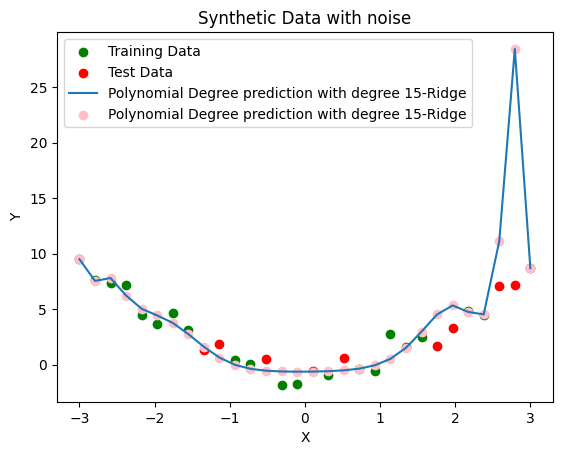

In [171]:
plt.scatter(X_train,Y_train,color='green',label='Training Data')
plt.scatter(X_test,Y_test,color='red',label='Test Data')
plt.plot(X_plot,Y_plot_ridge,label='Polynomial Degree prediction with degree 15-Ridge')
plt.scatter(X_plot,Y_plot_ridge,label='Polynomial Degree prediction with degree 15-Ridge',color='pink')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Synthetic Data with noise')
plt.legend()
plt.show()

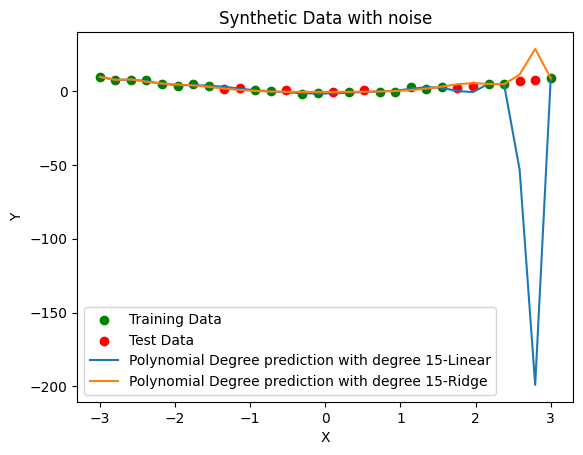

In [174]:
plt.scatter(X_train,Y_train,color='green',label='Training Data')
plt.scatter(X_test,Y_test,color='red',label='Test Data')
plt.plot(X_plot,y_plot,label='Polynomial Degree prediction with degree 15-Linear')
plt.plot(X_plot,Y_plot_ridge,label='Polynomial Degree prediction with degree 15-Ridge')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Synthetic Data with noise')
plt.legend()
plt.show()

In [223]:
poly_model = make_pipeline(PolynomialFeatures(degree=15),Lasso(alpha=10.0))

In [224]:
poly_model.fit(X_train,Y_train)

/Users/bkannadasan/Documents/GitHub/DataScience/.conda/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.911e+01, tolerance: 2.454e-02
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=15)),
                ('lasso', Lasso(alpha=10.0))])

In [179]:
Y_plot_lasso=poly_model.predict(X_plot)

/Users/bkannadasan/Documents/GitHub/DataScience/.conda/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


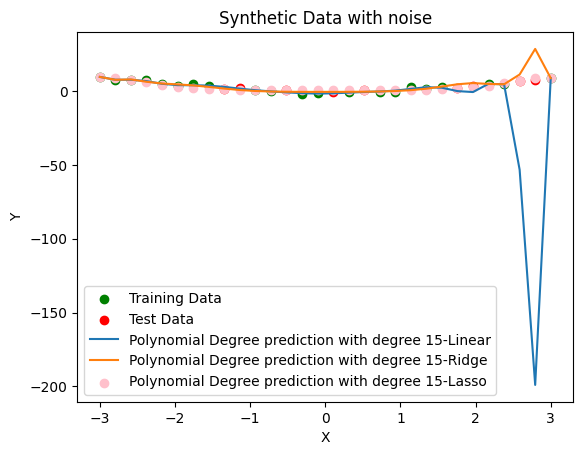

In [191]:
plt.scatter(X_train,Y_train,color='green',label='Training Data')
plt.scatter(X_test,Y_test,color='red',label='Test Data')
plt.plot(X_plot,y_plot,label='Polynomial Degree prediction with degree 15-Linear')
plt.plot(X_plot,Y_plot_ridge,label='Polynomial Degree prediction with degree 15-Ridge')
plt.scatter(X_plot,Y_plot_lasso,label='Polynomial Degree prediction with degree 15-Lasso',color='pink')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Synthetic Data with noise')
plt.legend()
plt.show()

In [225]:
poly_model.fit(X_train,Y_train)
y_train_pred = poly_model.predict(X_train)
y_test_pred = poly_model.predict(X_test)

/Users/bkannadasan/Documents/GitHub/DataScience/.conda/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.911e+01, tolerance: 2.454e-02
  model = cd_fast.enet_coordinate_descent(


In [226]:
print(" Model train MSE -Lasso", mean_squared_error(Y_train, y_train_pred))
print(" Model test MSE -Lasso", mean_squared_error(Y_test, y_test_pred))
print(" Model train R2-Lasso", r2_score(Y_train, y_train_pred))
print(" Model test R2-Lasso ", r2_score(Y_test, y_test_pred))

 Model train MSE -Lasso 1.9807061352295379
 Model test MSE -Lasso 0.6235304861402239
 Model train R2-Lasso 0.8305158536659469
 Model test R2-Lasso  0.9109354538766932


In [230]:
poly_model = make_pipeline(PolynomialFeatures(degree=15),ElasticNet(l1_ratio=.5))

In [231]:
poly_model.fit(X_train,Y_train)
y_train_pred = poly_model.predict(X_train)
y_test_pred = poly_model.predict(X_test)

/Users/bkannadasan/Documents/GitHub/DataScience/.conda/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.515e+01, tolerance: 2.454e-02
  model = cd_fast.enet_coordinate_descent(


In [232]:
print(" Model train MSE -Elastic", mean_squared_error(Y_train, y_train_pred))
print(" Model test MSE -Elastic", mean_squared_error(Y_test, y_test_pred))
print(" Model train R2-Elastic", r2_score(Y_train, y_train_pred))
print(" Model test R2-Elastic ", r2_score(Y_test, y_test_pred))

 Model train MSE -Elastic 0.9516423806376467
 Model test MSE -Elastic 0.9461830506866205
 Model train R2-Elastic 0.9185703049892424
 Model test R2-Elastic  0.864848045392895


In [198]:
Y_plot_elastic=poly_model.predict(X_plot)

/Users/bkannadasan/Documents/GitHub/DataScience/.conda/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


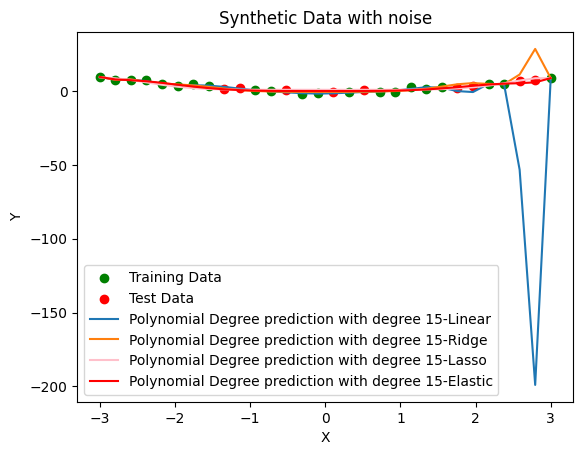

In [238]:
plt.scatter(X_train,Y_train,color='green',label='Training Data')
plt.scatter(X_test,Y_test,color='red',label='Test Data')
plt.plot(X_plot,y_plot,label='Polynomial Degree prediction with degree 15-Linear')
plt.plot(X_plot,Y_plot_ridge,label='Polynomial Degree prediction with degree 15-Ridge')
plt.plot(X_plot,Y_plot_lasso,label='Polynomial Degree prediction with degree 15-Lasso',color='pink')
plt.plot(X_plot,Y_plot_elastic,label='Polynomial Degree prediction with degree 15-Elastic',color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Synthetic Data with noise')
plt.legend()
plt.show()


Overfitted Model train MSE  0.24787907406314919
Overfitted Model test MSE  5130.941608830424
Overfitted Model train R2  0.9787895980557461
Overfitted Model test R2  -731.8991857390939


Model train MSE -Lasso 1.9807061352295379
Model test MSE -Lasso 0.6235304861402239
Model train R2-Lasso 0.8305158536659469
Model test R2-Lasso  0.9109354538766932


Model train MSE -Ridge 0.5570069566145949
Model test MSE -Ridge 53.823434856336945
Model train R2-Ridge 0.9523382863995555
Model test R2-Ridge  -6.688092086645735


Model train MSE -Elastic 0.9516423806376467
Model test MSE -Elastic 0.9461830506866205
Model train R2-Elastic 0.9185703049892424
Model test R2-Elastic  0.864848045392895

In [236]:
metrics =pd.DataFrame([[0.24787907406314919,5130.941608830424,0.9787895980557461,-731.8991857390939],
[1.9807061352295379,0.6235304861402239,0.8305158536659469,0.9109354538766932],
[0.5570069566145949,53.823434856336945,0.9523382863995555,-6.688092086645735],
[0.9516423806376467,0.9461830506866205,0.9185703049892424,0.864848045392895]],columns=['MSE-Train','MSE-Test','R2-Train','R2-Test'],index=['LR','L1','L2','NET'])

In [237]:
metrics

,MSE-Train,MSE-Test,R2-Train,R2-Test
LR,0.247879,5130.941609,0.978790,-731.899186
L1,1.980706,0.623530,0.830516,0.910935
L2,0.557007,53.823435,0.952338,-6.688092
NET,0.951642,0.946183,0.918570,0.864848
